
📊 Moyennes par date :

Genotype     APPPS1     WT
Date                      
Day 1     59.615000  42.42
Night 1   70.298333  37.16
Night 2   76.458333  48.39

✅ Fichier enregistré : C:\Users\AudreyHay\Documents\Carla\FED\Light Tracking\4 mois\Summary_first_poke_with_means.csv
📈 Graphique enregistré : C:\Users\AudreyHay\Documents\Carla\FED\Light Tracking\4 mois\WT_First_poke_correct.png


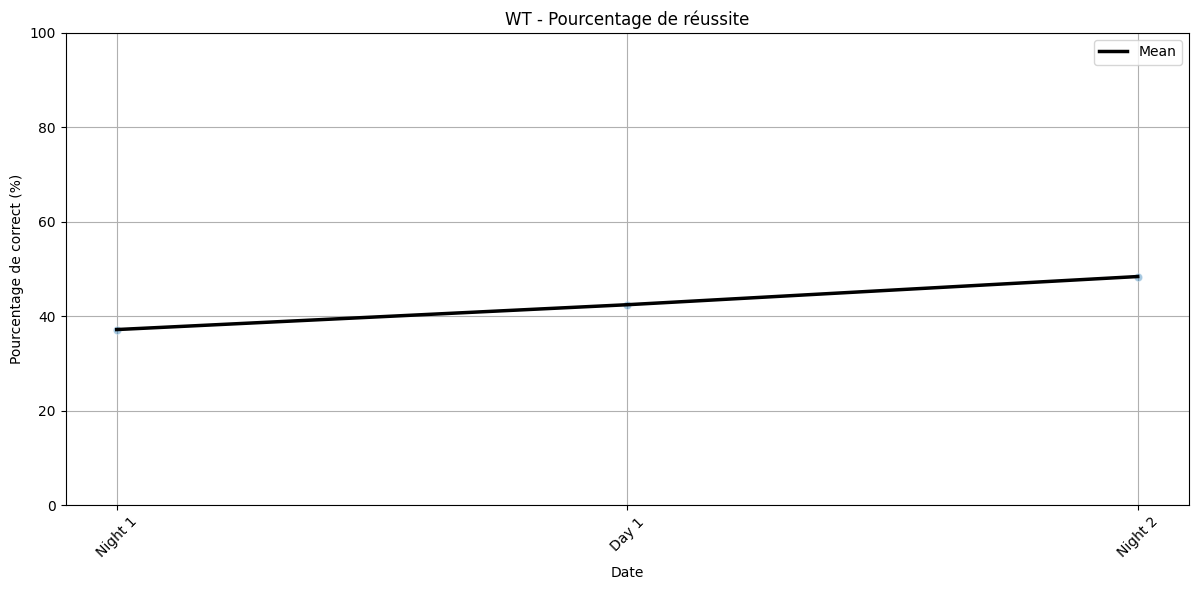

📈 Graphique enregistré : C:\Users\AudreyHay\Documents\Carla\FED\Light Tracking\4 mois\APPPS1_First_poke_correct.png


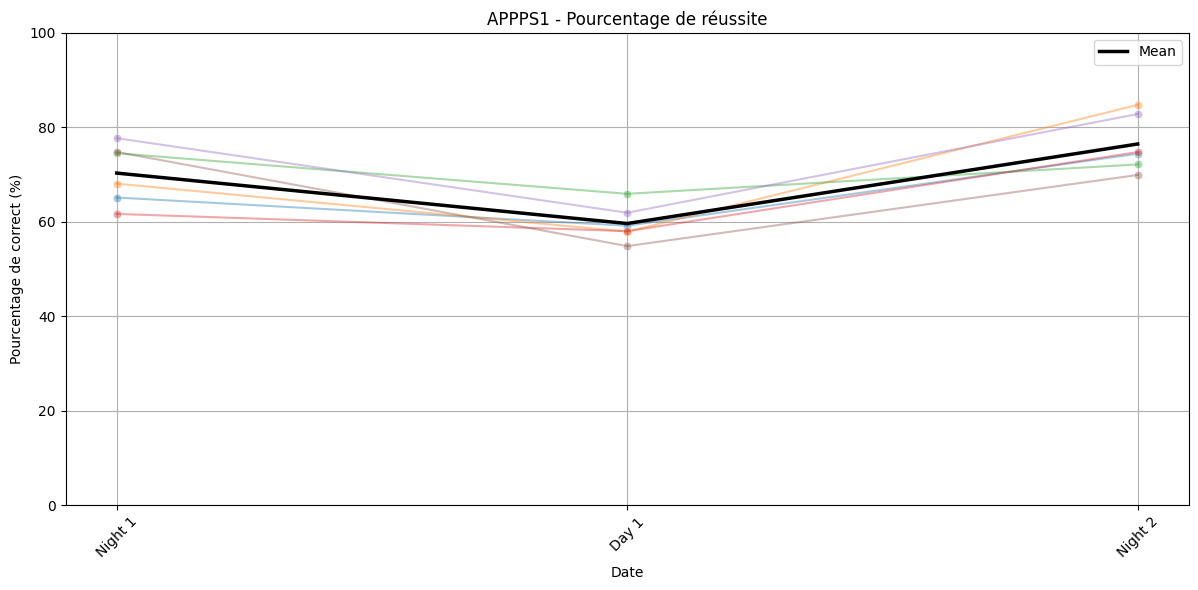

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# === 1. Charger le fichier ===
file_path = r"C:\Users\AudreyHay\Documents\Carla\FED\Light Tracking\4 mois\Summary_first_poke.csv"
df = pd.read_csv(file_path)

# === 2. Extraire génotypes et nettoyer ===
genotypes = df.iloc[0, 1:].to_dict()
df_clean = df.iloc[1:].copy()
df_clean.rename(columns={"Mice": "Date"}, inplace=True)

# === 3. Reformater pour analyse ===
df_melted = df_clean.melt(id_vars=["Date"], var_name="Mouse", value_name="Percentage")
df_melted["Genotype"] = df_melted["Mouse"].map(genotypes)
df_melted["Percentage"] = pd.to_numeric(df_melted["Percentage"], errors="coerce")

# === 4. Moyennes par génotype ===
mean_df = df_melted.groupby(["Date", "Genotype"])["Percentage"].mean().unstack()

# Afficher les moyennes dans la console
print("\n📊 Moyennes par date :\n")
print(mean_df)

# Ajouter les colonnes de moyenne dans le fichier d’origine
df_final = df_clean.copy()
df_final["Mean_WT"] = df_final["Date"].map(mean_df["WT"])
df_final["Mean_APPPS1"] = df_final["Date"].map(mean_df["APPPS1"])

# === 5. Enregistrer le nouveau fichier CSV ===
output_csv = os.path.join(os.path.dirname(file_path), "Summary_first_poke_with_means.csv")
df_final.to_csv(output_csv, index=False)
print(f"\n✅ Fichier enregistré : {output_csv}")

# === 6. Fonction de tracé, sauvegarde et affichage ===
def plot_and_save(df, genotype, filename):
    plt.figure(figsize=(12, 6))
    sub_df = df[df["Genotype"] == genotype]
    
    # Courbes individuelles
    sns.lineplot(data=sub_df, x="Date", y="Percentage", hue="Mouse", marker='o', legend=False, alpha=0.4)
    
    # Moyenne
    sns.lineplot(data=sub_df.groupby("Date")["Percentage"].mean().reset_index(), 
                 x="Date", y="Percentage", label="Mean", color="black", linewidth=2.5)
    
    plt.title(f"{genotype} - Pourcentage de réussite")
    plt.xticks(rotation=45)
    plt.ylabel("Pourcentage de correct (%)")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.ylim(0, 100)            # Fixe l'axe Y de 0 à 100
    
    # Sauvegarde + Affichage
    full_path = os.path.join(os.path.dirname(file_path), filename)
    plt.savefig(full_path)
    print(f"📈 Graphique enregistré : {full_path}")
    plt.show()

# Générer et afficher les graphiques
plot_and_save(df_melted, "WT", "WT_First_poke_correct.png")
plot_and_save(df_melted, "APPPS1", "APPPS1_First_poke_correct.png")
